In [221]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

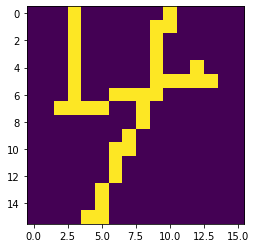

In [222]:
img2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)
img4=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)
img = np.reshape(img4,(16,16),order='F')
plt.imshow(img)

### Loading Files

In [223]:
#STORE TRAINIG & TESTING DATA IN NUMPY
trainX = np.loadtxt("trainX.txt", dtype=int)
trainY = np.loadtxt("trainY.txt", dtype=int)

testX = np.loadtxt("testX.txt", dtype=int)
testY = np.loadtxt("testY.txt", dtype=int)

#print(testY)

### Calculating Probs and Conditional Probs

In [224]:
#PROBABLITY FOR TWO AND FOUR CLASS 
two_prob = 250/500
four_prob = 1-two_prob

#DIVIDE TRAIN DATA INTO CLASSES two and four
two_train = trainX[:250,:]
four_train = trainX[250:500,:]


#ARRAY OF PROBS FOR EACH X IN TRAIN GIVEN CLASS 2
one_two_prob = two_train.sum(axis = 0) / two_train.shape[0]     #P(x = 0 | class = 2)
zero_two_prob = 1- one_two_prob                                 #P(x = 1 | class = 2)
#print(zero_two_prob.shape)


#ARRAY OF PROBS FOR EACH X IN TRAIN GIVEN CLASS 4
one_four_prob = four_train.sum(axis = 0) / four_train.shape[0]  #P(x = 0 | class = 4)
zero_four_prob = 1- one_four_prob                               #P(x = 1 | class = 4)
#print(zero_four_prob)

### Functions

In [225]:
# RETURN PREDICTED CLASS FOR A DATASET
def predictClass(data):
    output_data = np.empty(len(data))
    c = 0

    for i in data: 
        k = 0
        prob_entry2 = 1
        prob_entry4 = 1

        for j in i:
            if(j == 0):
                prob_entry2  = float(prob_entry2  * zero_two_prob[k])
                prob_entry4 = float(prob_entry4 * zero_four_prob[k])
                
            else:
                prob_entry2 = float(prob_entry2 * one_two_prob[k])
                prob_entry4 = float(prob_entry4 * one_four_prob[k])
                
            if prob_entry2 > prob_entry4:
                output_data[c] = 2
            else:
                output_data[c] = 4
                
            k+=1

        c += 1
    
    return output_data


# RETURNS ACCURACY OF RESULTS
def accuracy(predicted, actual):
    count = np.count_nonzero(predicted== actual)
    acc = (count / len(predicted))*100
    
    return acc

#### Calculating Prediction and accuracy for Train Data

In [226]:
predict_TrainY = predictClass(trainX)
print(predict_TrainY)

print("\n\nAccuracy For Training Data is " , accuracy(predict_TrainY, trainY) ,"%")

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

#### Calculating Prediction and accuracy for testing data

In [227]:
predict_TestY = predictClass(testX)
print(predict_TestY)


# for i in range(len(predict_TestY)):
#     if predict_TestY[i] == 2:
#         img = np.reshape(testX[i],(16,16),order='F')
#         plt.imshow(img)
#         print("RESULT 2 PICTURE \n\n")
#     else:
#         img = np.reshape(testX[i],(16,16),order='F')
#         plt.imshow(img)
#         print("RESULT 4 PICTURE \n\n")
        
        
print("\n\nAccuracy For Testing Data is " , accuracy(predict_TestY, testY) ,"%")

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4.]


Accuracy For Testing Data is  100.0 %
